# Building a Sentiment Analysis of Tweets 
## * Tweepy
## * TextBlob
## * WordCloud
## * NLTK
## * Word2Vec


## Goal: Use Clustering Techniques to Review Sentiment of Tweets
Work to tune a variety of models before choosing what you consider to be the best performer.

## Research Question: How can @PITAPOLICY use clustering techniques to segment a controversial political figure's tweets to understand where he is most polarizing?

## Methodology: 
#### We could use a Decision Tree Classifier used to classify tweets as ‘political’ in dataset since that is unlabeled. 

#### We could  use Word2Vec on out Twitter dataset to determine which phrases appear the most frequently in tweets to compare with whether they have been retweeted or flagged.


## Resources 
### Use to perform authentication: 
    auth = tweepy.0AuthHandler(consumer_key, consumer_secret)
Twitter Sentiment Analysis: https://www.youtube.com/watch?v=o_OZdbCzHUA

In [4]:
!pip install tweepy

In [6]:
!pip install keys

SyntaxError: invalid syntax (<ipython-input-6-b0cf0e9238e9>, line 1)

In [ ]:
!pip install tweetutilities

In [ ]:
!pip install geopy

In [ ]:
!pip install textblob

In [ ]:
!pip install preprocessor

In [ ]:
!pip install gensim

In [7]:
import tweepy 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim 
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

import folium

In [8]:
# from secrets import consumer_key,consumer_secret
#Need the API
    #consumer_key = ""
    #consumer_secret = ""

consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE' 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [9]:
#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 500, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) Factsheet on the illegitimate and felonious U.S. attempt to re-impose U.N. sanctions on Iran https://t.co/wPbFytmA98

2) أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌حمد البوسعيدي تعيينه وزيراً لخارجية سلطنة عمان الشقیقه وقد استلم الأمانة من أخ حكيم معالي يوسف بن علوي.
أتمنى للأخ بدر كل التوفيق والسداد في مسيرته وأرجو أن يجد من إخوانه في ایران العون في أداء مهمته كما وأرجو للأخ يوسف الصحة والعافية.

3) 67 years ago today, US/UK tried to suffocate the Iranian people’s demand for dignity in a coup overthrowing their elected government. 

Since 1979, the US has desperately tried to resuscitate the past. Yet it keeps getting humiliated by the Iranian people. 

Time to change tack?

4) I'll be delivering the fourth of five online talks at Faculty of World Studies, University of Tehran, today, Aug 17, 12:30-13:15 UTC

Topic: End of Hegemony

Live Instagram @iranian_studies_ut https://t.co/eJXxcA8E44

5) .@AmbJohnBolton has repeated today what he said on M

In [10]:
#Create a dataframe with a column and label column as 'Tweets'
import pandas as pd
df = pd.DataFrame([tweet.full_text for tweet in zarif_tweets], columns = ['Tweets'])
df.head(10)

,Tweets
0,Factsheet on the illegitimate and felonious U....
1,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...
2,"67 years ago today, US/UK tried to suffocate t..."
3,I'll be delivering the fourth of five online t...
4,.@AmbJohnBolton has repeated today what he sai...
5,"""Pirates of the Caribbean"" have their own judg..."
6,RT @TakhtRavanchi: The result of the vote in #...
7,In Beirut today to express the solidarity of t...
8,US is so desperate to show support for its str...
9,I just published Using Security Council to Des...


In [11]:
#Insert additional columns: 'retweet_count', 'user'
zarif_tweets_user = api.get_user('jzarif')

In [12]:
zarif_tweets_user.status.text

'Factsheet on the illegitimate and felonious U.S. attempt to re-impose U.N. sanctions on Iran https://t.co/wPbFytmA98'

In [13]:
#get description for column
zarif_tweets_user.description

'Foreign Minister of Islamic Republic of Iran'

In [14]:
#followers as a column
zarif_tweets_user.followers

<bound method User.followers of User(_api=<tweepy.api.API object at 0x120d40990>, _json={'id': 47813521, 'id_str': '47813521', 'name': 'Javad Zarif', 'screen_name': 'JZarif', 'location': 'Tehran, Iran', 'profile_location': None, 'description': 'Foreign Minister of Islamic Republic of Iran', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1583858, 'friends_count': 10, 'listed_count': 4063, 'created_at': 'Wed Jun 17 01:54:58 +0000 2009', 'favourites_count': 6, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 954, 'lang': None, 'status': {'created_at': 'Thu Aug 20 18:30:10 +0000 2020', 'id': 1296514880468549633, 'id_str': '1296514880468549633', 'text': 'Factsheet on the illegitimate and felonious U.S. attempt to re-impose U.N. sanctions on Iran https://t.co/wPbFytmA98', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1296514672779

In [15]:
#Number of Followers
zarif_tweets_user.followers_count

1583858

In [16]:
#Number of Friends
zarif_tweets_user.friends_count

10

In [17]:
followers =[]

In [18]:
cursor = tweepy.Cursor(api.followers, screen_name ='zarif_tweets_user')
cursor

In [19]:
cursor = tweepy.Cursor(api.followers, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers.append(account.screen_name)
    print(followers)

['MMovahedfard']
['MMovahedfard', 'meBL0fvJgslBZpP']
['MMovahedfard', 'meBL0fvJgslBZpP', 'ainaz_zn']
['MMovahedfard', 'meBL0fvJgslBZpP', 'ainaz_zn', 'himnsabah261']
['MMovahedfard', 'meBL0fvJgslBZpP', 'ainaz_zn', 'himnsabah261', 'mariam_morovat']
['MMovahedfard', 'meBL0fvJgslBZpP', 'ainaz_zn', 'himnsabah261', 'mariam_morovat', 'Amir82969570']
['MMovahedfard', 'meBL0fvJgslBZpP', 'ainaz_zn', 'himnsabah261', 'mariam_morovat', 'Amir82969570', 'khadijaahamed2']
['MMovahedfard', 'meBL0fvJgslBZpP', 'ainaz_zn', 'himnsabah261', 'mariam_morovat', 'Amir82969570', 'khadijaahamed2', 'Mero_9988776655']
['MMovahedfard', 'meBL0fvJgslBZpP', 'ainaz_zn', 'himnsabah261', 'mariam_morovat', 'Amir82969570', 'khadijaahamed2', 'Mero_9988776655', 'Akhtar77929570']
['MMovahedfard', 'meBL0fvJgslBZpP', 'ainaz_zn', 'himnsabah261', 'mariam_morovat', 'Amir82969570', 'khadijaahamed2', 'Mero_9988776655', 'Akhtar77929570', 'MANaeini']


In [20]:
print("Followers:", ''.join(sorted(followers, key=lambda s:s.lower())))
#normalize by number of followers based on RT's

Followers: ainaz_znAkhtar77929570Amir82969570himnsabah261khadijaahamed2MANaeinimariam_morovatmeBL0fvJgslBZpPMero_9988776655MMovahedfard


In [21]:
#Determine who Javed Zarif follows: 'friends'
friends = []
cursor = tweepy.Cursor(api.friends, screen_name = 'JZarif')
for friend in cursor.items(10):
    friends.append(friend.screen_name)
print (friends)

['IPIS_Iran', 'TakhtRavanchi', 'IranForMin', 'SAMOUSAVI9', 'IRIMFA_EN', 'IRIMFA_AR', 'ebtekarm', 'araghchi', 'khamenei_ir', 'HassanRouhani']


In [22]:
print('Friends:', ''.join(sorted(friends, key =  lambda s: s.lower())))
#Label as 'friends'

Friends: araghchiebtekarmHassanRouhaniIPIS_IranIranForMinIRIMFA_ARIRIMFA_ENkhamenei_irSAMOUSAVI9TakhtRavanchi


## Clean Text

In [24]:
#Create a function to clean tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(clean_text)
df

,Tweets
0,Factsheet on the illegitimate and felonious U....
1,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...
2,"67 years ago today, US/UK tried to suffocate t..."
3,I'll be delivering the fourth of five online t...
4,.@AmbJohnBolton has repeated today what he sai...
...,...
195,The imperative now is to end the incursion int...
196,Grateful to PM @ImranKhanPTI for his efforts t...
197,Iran's Leader has long made it abundantly clea...
198,The Adana Agreement between Turkey and Syria—s...


In [25]:
#Select tweets for review
df['tweets_fixed'] = df['Tweets'].apply(lambda x: x if type(x) == str else '')

# Exploratory Data Analysis: Word Cloud

<function matplotlib.pyplot.show(*args, **kw)>

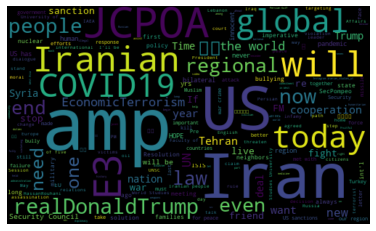

In [26]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['tweets_fixed']])
WordCloud = WordCloud(width = 500, height= 300, random_state = 21, 
                      max_font_size =100).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

## Measuring Javed Zarif's Polarity & Subjectivity

In [27]:
#Create a function to get 'subjectivity' and 'polarity'

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity'] = df['tweets_fixed'].apply(get_subjectivity)
df['polarity'] = df['tweets_fixed'].apply(get_polarity)

#Show the new dataframe
df

,Tweets,tweets_fixed,subjectivity,polarity
0,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000
1,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000
2,"67 years ago today, US/UK tried to suffocate t...","67 years ago today, US/UK tried to suffocate t...",0.625000,-0.425000
3,I'll be delivering the fourth of five online t...,I'll be delivering the fourth of five online t...,0.250000,0.068182
4,.@AmbJohnBolton has repeated today what he sai...,.@AmbJohnBolton has repeated today what he sai...,0.450000,0.100000
...,...,...,...,...
195,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000
196,Grateful to PM @ImranKhanPTI for his efforts t...,Grateful to PM @ImranKhanPTI for his efforts t...,0.375000,-0.125000
197,Iran's Leader has long made it abundantly clea...,Iran's Leader has long made it abundantly clea...,0.391667,0.025000
198,The Adana Agreement between Turkey and Syria—s...,The Adana Agreement between Turkey and Syria—s...,0.500000,0.500000


In [28]:
#Create a function to denote the positive, negative, and neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

#Show df
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
1,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
2,"67 years ago today, US/UK tried to suffocate t...","67 years ago today, US/UK tried to suffocate t...",0.625000,-0.425000,Negative
3,I'll be delivering the fourth of five online t...,I'll be delivering the fourth of five online t...,0.250000,0.068182,Positive
4,.@AmbJohnBolton has repeated today what he sai...,.@AmbJohnBolton has repeated today what he sai...,0.450000,0.100000,Positive
...,...,...,...,...,...
195,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative
196,Grateful to PM @ImranKhanPTI for his efforts t...,Grateful to PM @ImranKhanPTI for his efforts t...,0.375000,-0.125000,Negative
197,Iran's Leader has long made it abundantly clea...,Iran's Leader has long made it abundantly clea...,0.391667,0.025000,Positive
198,The Adana Agreement between Turkey and Syria—s...,The Adana Agreement between Turkey and Syria—s...,0.500000,0.500000,Positive


In [29]:
#Print all the positive tweets
j =1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Positive'):
        print(str(j) + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1
      

1I'll be delivering the fourth of five online talks at Faculty of World Studies, University of Tehran, today, Aug 17, 12:30-13:15 UTC

Topic: End of Hegemony

Live Instagram @iranian_studies_ut 

2.@AmbJohnBolton has repeated today what he said on May 8, 2018, while National Security Advisor in the Trump administration.

At least he is consistent—a trait notably absent in this US administration.

US recourse to Dispute Resolution Mechanism in 2231 has NO LEG TO STAND ON. 

3The first three (of five) talks on "The World in Transition" that I've delivered at the Faculty of World Studies, University of Tehran, are available here: 

First Session:


Second Session:


Third Session:


4I'll be delivering the third of five online talks at Faculty of World Studies, University of Tehran, today, Aug 10, 12:30-13:15 UTC

Topic: Power Shifts and New Players in the Transitional Period

Live Instagram @iranian_studies_ut

Watch 2nd session @ 

5Reiterated Iran's strong and steadfast solidarity with

In [30]:
#Let's see Negative Tweets in new df
j = 1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1)67 years ago today, US/UK tried to suffocate the Iranian people’s demand for dignity in a coup overthrowing their elected government. 

Since 1979, the US has desperately tried to resuscitate the past. Yet it keeps getting humiliated by the Iranian people. 

Time to change tack?

2)"Pirates of the Caribbean" have their own judges and courts now.

Sadly for them, stolen booty wasn't Iran's. Fuel was sold F.O.B. Persian Gulf. Ship and flag weren't ours either.

Hollow, cheap propaganda doesn’t deflect from miserable failure of US diplomatic malpractice at UN.

3)US is so desperate to show support for its struggle to illegally extend arms restrictions on Iran that it clings to the personal position of GCC SG—obtained thru coercion—as regional consensus.

All knew that most in the region—even in GCC—do NOT subscribe to this.

Here's proof: 

4)I just published Using Security Council to Destroy Security Council 

5)75 years ago today, the US gained the infamy of becoming the 1st and ONLY 

## Sentiment Analysis  

### Visualize Tweets by Minister Zarif

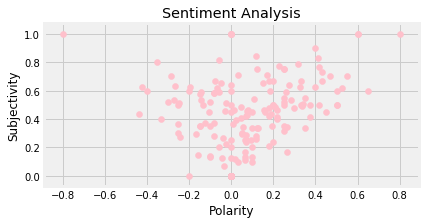

In [31]:
#Plot the polarity and subjectivity
plt.figure(figsize=(6,3)) 
for i in range(0, sorted_DF.shape[0]): 
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Pink') 

plt.title ('Sentiment Analysis' ) 
plt.xlabel ('Polarity') 
plt.ylabel ('Subjectivity')     
plt.show()
    

In [32]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ptweets)

3      I'll be delivering the fourth of five online t...
4      .@AmbJohnBolton has repeated today what he sai...
11     The first three (of five) talks on "The World ...
12     I'll be delivering the third of five online ta...
18     Reiterated Iran's strong and steadfast solidar...
                             ...                        
189    Our response to US EconomicTerrorism &amp; bla...
192    Contrary to its deceptive claims, new US regul...
193    Met with Yemen’s Mohammad Abdul-Salam in Tehra...
197    Iran's Leader has long made it abundantly clea...
198    The Adana Agreement between Turkey and Syria—s...
Name: Tweets, Length: 96, dtype: object


In [33]:
round ((ptweets.shape[0] / df.shape[0])*100,1)

48.0

In [34]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ntweets)

2      67 years ago today, US/UK tried to suffocate t...
5      "Pirates of the Caribbean" have their own judg...
8      US is so desperate to show support for its str...
9      I just published Using Security Council to Des...
13     75 years ago today, the US gained the infamy o...
28     As we mark EidAlAdha (Feast of the Sacrifice),...
36     Productive talks in Baghdad with PM @MAKadhimi...
38     25 yrs ago today, SrebrenicaGenocide began as ...
40     Don't believe the hype: Iran triggered JCPOA D...
44     The US isn't merely violating JCPOA and bullyi...
46     .@SecPompeo is so desperate to mislead the wor...
47     E3 must stop public face-saving &amp; muster t...
49     Iran &amp; Russia are "determined to deal with...
51     Productive talks with my friend @MevlutCavusog...
52     International Criminal COURT now blackmailed b...
54     US has tried to heighten tension w/ Iran &amp;...
55     We achieved humanitarian swap *despite* your s...
59     Some don't think BlackLi

In [35]:
round ((ntweets.shape[0] / df.shape[0])*100,1)

24.0

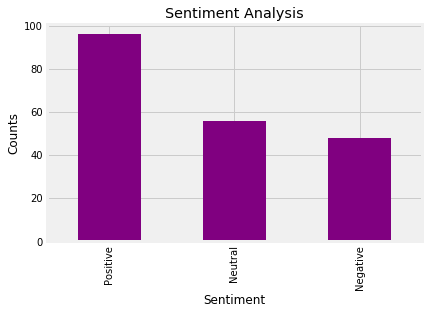

In [36]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and show
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df['Analysis'].value_counts().plot(kind='bar', color = 'Purple')
plt.show()

In [37]:
#What did I wrong: not seeing new columns "id", 'retweets'
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in zarif_tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in zarif_tweets])
        df['len'] = np.array([len(tweet.text) for tweet in zarif_tweets])
        df['date'] = np.array([tweet.created_at for tweet in zarif_tweets])
        df['source'] = np.array([tweet.source for tweet in zarif_tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in zarif_tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in zarif_tweets])
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
1,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
2,"67 years ago today, US/UK tried to suffocate t...","67 years ago today, US/UK tried to suffocate t...",0.625000,-0.425000,Negative
3,I'll be delivering the fourth of five online t...,I'll be delivering the fourth of five online t...,0.250000,0.068182,Positive
4,.@AmbJohnBolton has repeated today what he sai...,.@AmbJohnBolton has repeated today what he sai...,0.450000,0.100000,Positive
...,...,...,...,...,...
195,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative
196,Grateful to PM @ImranKhanPTI for his efforts t...,Grateful to PM @ImranKhanPTI for his efforts t...,0.375000,-0.125000,Negative
197,Iran's Leader has long made it abundantly clea...,Iran's Leader has long made it abundantly clea...,0.391667,0.025000,Positive
198,The Adana Agreement between Turkey and Syria—s...,The Adana Agreement between Turkey and Syria—s...,0.500000,0.500000,Positive


In [39]:
#Review subjectivity and polarity of Zarif
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['tweets_fixed'].apply(pol)
df['subjectivity'] = df['tweets_fixed'].apply(sub)
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
1,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
2,"67 years ago today, US/UK tried to suffocate t...","67 years ago today, US/UK tried to suffocate t...",0.625000,-0.425000,Negative
3,I'll be delivering the fourth of five online t...,I'll be delivering the fourth of five online t...,0.250000,0.068182,Positive
4,.@AmbJohnBolton has repeated today what he sai...,.@AmbJohnBolton has repeated today what he sai...,0.450000,0.100000,Positive
...,...,...,...,...,...
195,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative
196,Grateful to PM @ImranKhanPTI for his efforts t...,Grateful to PM @ImranKhanPTI for his efforts t...,0.375000,-0.125000,Negative
197,Iran's Leader has long made it abundantly clea...,Iran's Leader has long made it abundantly clea...,0.391667,0.025000,Positive
198,The Adana Agreement between Turkey and Syria—s...,The Adana Agreement between Turkey and Syria—s...,0.500000,0.500000,Positive


# Analysis II: Topic Modeling
## TFIDF
Implement Term Frequency-Inverse Document Frequency for Clustering.

In [40]:
#Define number of topics and number of words
num_topics, num_top_words = 5, 20

### Top Words

In [41]:
num_top_words= 20

def show_topics(a):
    #top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    top_words = lambda t: [text[i] for i in range(0, sorted_DF.shape[0])
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

SyntaxError: invalid syntax (<ipython-input-41-1c0bcf938760>, line 6)

In [ ]:
print(show_topics)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Need vectors for LSA and LDA topic modeling. 
#Substitute 'emma_pars' with our text: fixed tweets 'tweets_fixed'
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(df['tweets_fixed'], test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the tweets
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


In [44]:
#Applying the vectorizer
tweets_fixed_tfidf = vectorizer.fit_transform(df['tweets_fixed'])
print("Number of features: %d" % tweets_fixed_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(tweets_fixed_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_by_tweet = [{} for _ in range(0,n)]

#List of features
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_by_tweet[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[1])
print('Tf_idf vector:', tfidf_by_tweet[1])

Number of features: 704
Original sentence: أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌حمد البوسعيدي تعيينه وزيراً لخارجية سلطنة عمان الشقیقه وقد استلم الأمانة من أخ حكيم معالي يوسف بن علوي.
أتمنى للأخ بدر كل التوفيق والسداد في مسيرته وأرجو أن يجد من إخوانه في ایران العون في أداء مهمته كما وأرجو للأخ يوسف الصحة والعافية.
Tf_idf vector: {'shameless': 0.30424135476778785, 'exhausted': 0.30424135476778785, 'having': 0.2874248413124022, 'say': 0.2874248413124022, 'come': 0.27438094010167624, 'claims': 0.27438094010167624, 'mislead': 0.30424135476778785, 'secpompeo': 0.2469067833426873, 'way': 0.27438094010167624, 'desperate': 0.2874248413124022, 'fuel': 0.30424135476778785, 'world': 0.19334482416224646, 'iran': 0.24022862531693398}


#### Observation: We have 704 features in our TFIDF matrix.  

In [65]:
print(tweets_fixed_tfidf)

  (0, 324)	0.30534291235138733
  (0, 527)	0.5555163527340682
  (0, 304)	0.7734127537879184
  (1, 695)	0.2533583903682833
  (1, 682)	0.21961679085466376
  (1, 669)	0.22849199243461055
  (1, 692)	0.584251178762973
  (1, 674)	0.2533583903682833
  (1, 694)	0.2533583903682833
  (1, 683)	0.2533583903682833
  (1, 698)	0.42422582967813033
  (1, 691)	0.2393543612844824
  (1, 686)	0.2533583903682833
  (2, 107)	0.22816358576801624
  (2, 599)	0.18122236219906648
  (2, 259)	0.24151287037604546
  (2, 346)	0.24151287037604546
  (2, 451)	0.22816358576801624
  (2, 7)	0.22816358576801624
  (2, 266)	0.20934882584699807
  (2, 206)	0.24151287037604546
  (2, 455)	0.3167400427938649
  (2, 325)	0.33366054347768426
  (2, 607)	0.4830257407520909
  (2, 612)	0.22816358576801624
  :	:
  (198, 321)	0.23668542208367335
  (198, 452)	0.22749196716367856
  (198, 83)	0.22749196716367856
  (198, 88)	0.26244349713882537
  (198, 610)	0.71005626625102
  (198, 577)	0.20173389210852652
  (198, 48)	0.24793730154197086
  (198, 

## LSA Model
### Apply LSA Model to Training Set
We are applying the Latent Semantic Analysis, instead of the Vector Space Model, to conduct a tweet similarity analysis because our body of 200 tweets is long. Also, LSA recognizes the occurence of synonyms rather than counting them as different from each other. In addition to context, LSA considers how a word can be used for slightly different meanings. The goal is to identify clusters of terms that reflect topics appearing in Zarif's tweets.

**Note: LSA is the process of applying feature dimension reduction to a tf-idf term-document matrix.
Since we don't want to mean-center our variables, which means we lose sparsity, we will use another dimension reduction method aside from Pincipal Compenent Analysis. This is called Singular Value Decomposition (SVD). 

#### Dimension reduction: Singular Value Decomposition (SVD)
We have our vectors, with one vector per tweet. Will use a dimension reduction technique called Singular Value Decomposition (SVD) function from sklearn rather than PCA because we don't want to mean-center our variables (and thus lose sparsity).

In [45]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130. 
 ## We subsitute 'svd' as our pca for dimension reduction.
svd = TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
#paras_by_component = pd.DataFrame(X_train_lsa,index=X_train)
tweets_by_component = pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    #print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])
    print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 100.00000000000004
Component 0:
tweets_fixed
Iran &amp; Russia are "determined to deal with unilateral &amp; illegal approaches to resolve global crises.”\n\nFrom joint statement with FM Lavrov in Moscow today, where we reaffirmed commitment to int'l law as US &amp; cronies attack foundation of int'l relations at IAEA &amp; Security Council.     0.458690
Iran is rich in human &amp; natural resources. We don't need charity from @realDonaldTrump—who's forced to buy ventilators from sources he's sanctioned.\n\nWhat we want is for him to STOP preventing Iran from selling oil &amp; other products, buying its needs &amp; making &amp; receiving payments.     0.457337
E3 must stop public face-saving &amp; muster the courage to state publicly what they admit privately: their failure to fulfill even own JCPOA duties due to total impotence in resisting US bullying\nBehind facade, E3 are accessories to Trump &amp; Netanyahu—&amp; in no position to couns

### Sentence similarity
We can also look at how similar various tweets are to one another. For example, here are the similarity scores (as a heatmap) of the first 10 tweets in the training set:

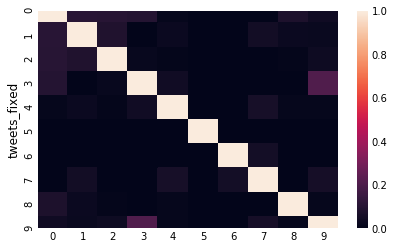

Key:
0 To my EU/E3 Colleagues 
1."Fully upheld commitments under JCPOA"
YOU? Really?
Just show ONE  that you've upheld in the last 18 months
2.Iran triggered-&amp; exhausted-dispute resolution mechanism while you were procrastinating
We're now using para36 remedies
Look at my 6/11/18 letter 
1 .@SecPompeo is so desperate to mislead the world that he claims come October, Iran will purchase fighter aircraft. 

And then send them off to the limits of their ONE-WAY ranges.

Perhaps he could also say how they would fly back to Iran having exhausted their fuel.

Shameless 
2 Told Raisina2020 that Iran believes in diplomacy: but not in re-negotiating a UNSC Resolution we agreed on with 6 Governments &amp; EU. 

We did not sign an "Obama deal" to go for a "Trump deal" now. Even if we did, who's to say we won't need Biden, Sanders or Warren deal next year? 
3 The imperative now is to end the incursion into Syria &amp; address all concerns through ADANA.

Meanwhile, it is essential that the core

In [46]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

### Apply LSA Model to Test Set 

In [47]:
# Run SVD on the test data, then project the test data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

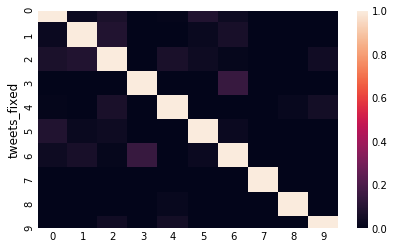

Key:
0 Reiterated Iran's strong and steadfast solidarity with people of Lebanon in call with FM Wehbeh. 

Iran is sending field hospital &amp; medicine to assist with disaster relief. 

Iran stands with Lebanon. 
1 Wrapping up a presidential visit to Tokyo—with a packed schedule—and heading home on Yalda. On 1st such visit in 19 years, we engaged with Japan's foreign policy and industry leaders, and, importantly. celebrated the 90th anniversary of Iran-Japan diplomatic relations. 
2 We're closely engaged w/ @WHO to battle COVID19  in Iran &amp; ensure proper care for those infected

Strict preventive measures—including screening of air travelers at departure gates—are being implemented

Global &amp; regional coop imperative. We either win together or lose together.  
3 Aparat
Persian:


English:

4 After getting our hostage back this week, fully ready for comprehensive prisoner exchange.
 
The ball is in the US’ court.

Today, back to regional diplomacy in Istanbul, at the Ministerial 

In [48]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index = X_test).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels = range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

In [66]:
tweets_by_component

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
tweets_fixed,,,,,,,,,,,,,,,,,,,,,
"To my EU/E3 Colleagues \n1.""Fully upheld commitments under JCPOA""\nYOU? Really?\nJust show ONE that you've upheld in the last 18 months\n2.Iran triggered-&amp; exhausted-dispute resolution mechanism while you were procrastinating\nWe're now using para36 remedies\nLook at my 6/11/18 letter",0.243435,-0.128508,-0.109688,1.047564e-14,0.275144,0.022025,-0.159144,-0.002107,0.038031,0.108141,...,-0.065110,0.086347,0.041398,0.011167,-0.048243,-0.000000e+00,0.000000e+00,0.000000e+00,3.676759e-40,0.000000e+00
".@SecPompeo is so desperate to mislead the world that he claims come October, Iran will purchase fighter aircraft. \n\nAnd then send them off to the limits of their ONE-WAY ranges.\n\nPerhaps he could also say how they would fly back to Iran having exhausted their fuel.\n\nShameless",0.174142,-0.158172,0.164557,5.953151e-15,0.143441,-0.008405,0.021202,-0.001053,0.124974,0.008234,...,0.050244,-0.020960,-0.017475,-0.003145,0.022225,3.537226e-34,6.579223e-33,6.396323e-33,-7.402678e-35,1.737996e-40
"Told Raisina2020 that Iran believes in diplomacy: but not in re-negotiating a UNSC Resolution we agreed on with 6 Governments &amp; EU. \n\nWe did not sign an ""Obama deal"" to go for a ""Trump deal"" now. Even if we did, who's to say we won't need Biden, Sanders or Warren deal next year?",0.193401,-0.014517,-0.033457,4.644937e-15,0.127125,-0.135944,0.018666,-0.016919,-0.086550,0.190059,...,-0.003224,0.004895,-0.076613,-0.022090,0.051938,1.857489e-32,-2.133862e-33,1.289650e-32,-5.992057e-35,-1.574785e-40
"The imperative now is to end the incursion into Syria &amp; address all concerns through ADANA.\n\nMeanwhile, it is essential that the core principles of JUS IN BELLO are fully observed: distinction between civilians and combatant, &amp; prohibition on inflicting unnecessary suffering.",0.253475,0.057750,-0.167569,-6.598134e-15,-0.164072,0.112635,0.169431,-0.129139,-0.018170,0.061185,...,-0.004222,-0.095945,0.023827,0.010512,0.022352,-1.548689e-33,1.110080e-32,5.700027e-33,2.648618e-34,1.842873e-40
"Saddened to hear of the passing of Javier Pérez de Cuéllar, UN Secretary General from 1982 to 91. \n\nAs a young diplomat, I came to appreciate his skill—he oversaw the end to many conflicts, including a cease fire in the war Saddam imposed on Iran. \n\nMy condolences to his family.",0.103167,-0.029994,0.072963,-2.353424e-15,-0.046124,0.006671,0.107608,-0.008536,0.022863,0.093744,...,-0.004878,0.001167,0.016993,0.015104,0.020107,1.197155e-32,-5.342742e-33,2.500648e-33,9.820020e-34,2.086188e-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"On 2nd anniversary of US ""ceasing participation"" in the JCPOA, I urged @antonioguterres to hold US accountable for violating its duties &amp; forcing others to do so, too.\n\nLawless bullying jeopardizes @UN credibility &amp; threatens int'l peace &amp; security.\n\n",0.365631,-0.009900,-0.268027,1.493743e-15,0.037908,0.128650,0.041536,0.015249,-0.090517,-0.053089,...,-0.075424,0.044937,-0.034743,-0.042899,-0.017762,-4.187353e-34,-1.337209e-32,1.114219e-32,3.632831e-34,5.106130e-42
"Contrary to its deceptive claims, new US regulations will aggravate EconomicTerrorism on ordinary Iranians. @SecPompeo voiced his delusion that Iranian people must bow to US ""if they want to eat"". Now, @USTreasury is targeting not merely food but also our imports of medicine.",0.122947,-0.162039,0.238222,-5.293703e-15,-0.135512,0.040027,0.077399,0.369692,-0.122252,0.015578,...,0.030260,0.050703,-0.015198,0.016432,-0.005429,-1.225118e-32,6.711670e-33,-6.172358e-33,-2.421887e-34,-2.165134e-40
"Iranians turned out in huge numbers to rally on the 41st anniversary of their revolution–and to honor their fallen heroes.\nMessage to Trump (+vassals): Time to abandon your delusions\nWith all challenges &amp; differences, in defending country &amp; honor, all 82 million Iranians are ONE.",0.232

## Latent Dirichlect Allocation Model 

### What are our topics in this probabilistic modeling approach?


In [68]:
#tweets_fixed_tfidf is our data
print(tweets_fixed_tfidf)

  (0, 324)	0.30534291235138733
  (0, 527)	0.5555163527340682
  (0, 304)	0.7734127537879184
  (1, 695)	0.2533583903682833
  (1, 682)	0.21961679085466376
  (1, 669)	0.22849199243461055
  (1, 692)	0.584251178762973
  (1, 674)	0.2533583903682833
  (1, 694)	0.2533583903682833
  (1, 683)	0.2533583903682833
  (1, 698)	0.42422582967813033
  (1, 691)	0.2393543612844824
  (1, 686)	0.2533583903682833
  (2, 107)	0.22816358576801624
  (2, 599)	0.18122236219906648
  (2, 259)	0.24151287037604546
  (2, 346)	0.24151287037604546
  (2, 451)	0.22816358576801624
  (2, 7)	0.22816358576801624
  (2, 266)	0.20934882584699807
  (2, 206)	0.24151287037604546
  (2, 455)	0.3167400427938649
  (2, 325)	0.33366054347768426
  (2, 607)	0.4830257407520909
  (2, 612)	0.22816358576801624
  :	:
  (198, 321)	0.23668542208367335
  (198, 452)	0.22749196716367856
  (198, 83)	0.22749196716367856
  (198, 88)	0.26244349713882537
  (198, 610)	0.71005626625102
  (198, 577)	0.20173389210852652
  (198, 48)	0.24793730154197086
  (198, 

In [69]:
print(tfidf_by_tweet)

[{'really': 0.2675862456153399, 'colleagues': 0.25279579182150563, 'eu': 0.2171593642227135, 'commitments': 0.2675862456153399, 'letter': 0.2319498180165478, 'months': 0.25279579182150563, 'exhausted': 0.2675862456153399, 'e3': 0.17268768574134052, 'triggered': 0.25279579182150563, 'jcpoa': 0.15462144280783993, 'fully': 0.24132342457603512, 'amp': 0.1063826574796637, 've': 0.2319498180165478, 'using': 0.2675862456153399, 'just': 0.205686996977243, 'mechanism': 0.2675862456153399, 'resolution': 0.2171593642227135, 'dispute': 0.2675862456153399, 'iran': 0.10564289655322445}, {'shameless': 0.30424135476778785, 'exhausted': 0.30424135476778785, 'having': 0.2874248413124022, 'say': 0.2874248413124022, 'come': 0.27438094010167624, 'claims': 0.27438094010167624, 'mislead': 0.30424135476778785, 'secpompeo': 0.2469067833426873, 'way': 0.27438094010167624, 'desperate': 0.2874248413124022, 'fuel': 0.30424135476778785, 'world': 0.19334482416224646, 'iran': 0.24022862531693398}, {'raisina2020': 0.2

In [70]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

In [75]:
# One of the required inputs is a term-document matrix
#Transpose data, which is tweets_fixed_tfidf
tdm = tweets_fixed_tfidf.transpose()
tdm

<704x200 sparse matrix of type '<class 'numpy.float64'>'
	with 2529 stored elements in Compressed Sparse Column format>

In [88]:
# Get the word list.
terms = vectorizer.get_feature_names()

# Number of topics.
ntopics=5

# Linking words to topics
def word_topic(tweets_fixed_tfidf,solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tweets_fixed_tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

In [92]:
# Extract the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_components = range(components.shape[1])
    index = np.repeat(n_components, n_top_words, axis=0)
    topwords = pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sorted_words=components.iloc[:,column].sort_values(ascending=False)
        
        # Choose the N highest loadings.
        chosen = sorted_words[:n_top_words]
        
        # Combine loading and index into a string.
        chosenlist = chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column] = [x for x in chosenlist]
    return(topwords)

# Number of words to look at for each topic.
n_top_words = 10

In [93]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components = ntopics, 
          doc_topic_prior=None, # Prior = 1/n_documents
          topic_word_prior=1/ntopics,
          learning_decay=0.7, # Convergence rate.
          learning_offset=10.0, # Causes earlier iterations to have less influence on the learning
          max_iter=10, # when to stop even if the model is not converging (to prevent running forever)
          evaluate_every=-1, # Do not evaluate perplexity, as it slows training time.
          mean_change_tol=0.001, # Stop updating the document topic distribution in the E-step when mean change is < tol
          max_doc_update_iter=100, # When to stop updating the document topic distribution in the E-step even if tol is not reached
          n_jobs=-1, # Use all available CPUs to speed up processing time.
          verbose=0, # amount of output to give while iterating
          random_state=0
         )

tweets_lda = lda.fit_transform(tweets_fixed_tfidf) 

components_lda = word_topic(tweets_fixed_tfidf, tweets_lda, terms) #use tweets_lda from line 17

topwords['LDA']=top_words(components_lda, n_top_words) #To identify top words: Use components_lda from line 19 


ValueError: Shape of passed values is (704, 5), indices imply (2571, 5)

In [ ]:
m,n=vectors.shape
d=5  # num topics

# Data Processing

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [51]:
vectorizer = CountVectorizer(stop_words='english') #, tokenizer=LemmaTokenizer())

In [52]:
vectors = vectorizer.fit_transform(df['tweets_fixed']).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(200, 2571)

In [54]:
print(len(df['tweets_fixed']), vectors.shape)

200 (200, 2571)


In [55]:
vocab = np.array(vectorizer.get_feature_names())

In [56]:
vocab.shape

(2571,)

In [59]:

vocab[1000:1020]

array(['iranians', 'iraq', 'iraqi', 'iraqis', 'isis', 'islam', 'islamic',
       'isn', 'isolation', 'ispi', 'israel', 'israeli', 'issued',
       'issues', 'istanbul', 'jailed', 'japan', 'japanese', 'javier',
       'jcpoa'], dtype='<U28')

# Finish Data Processing

## NMF: Non-negative Matrix Factorization

In [60]:
m,n=vectors.shape
d=5  # num topics

In [61]:
#decomposition is for images
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

NameError: name 'decomposition' is not defined

## Visualizing Vectors: TSNE Plot
Using 'word2vec' allows us to identify similarities between words that never occur near one another in the tweets.

In [ ]:
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='svd', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens) #SVD: substituted dimension reduction for 'pca'

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy =(x[i], y[i]),
                     xytext =(5, 2),
                     textcoords ='offset points',
                     ha ='right',
                     va ='bottom')
    plt.show()

In [ ]:
#Substituted tweets_fixed_tfidf 
# then tweets_by_component for corpus 
print(tweets_by_component)
model = word2vec.Word2Vec(tweets_by_component, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)


In [ ]:
## Part 1: Use tweets_by_component
# sklearn tfidf
vectorizer = TfidfVectorizer()
sklearn_tfidf = vectorizer.fit_transform(tweets_by_component)

# Getting the word list.
terms = vectorizer.get_feature_names()

# Number of topics.
ntopics=len(newsgroups.target_names)

# Linking words to topics
def word_topic(tfidf, solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

In [ ]:
# Part 2: Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=chosenlist
    return(topwords)

# Number of words to look at for each topic.
n_top_words = 10